# AMCAT Data Analysis

AMCAT (Aspiring Minds Computer Adaptive Test) is an employability assessment test used by companies to evaluate the job-readiness of candidates. The test assesses various skills such as aptitude, technical knowledge, and communication skills.

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [236]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\data.xlsx - Sheet1.csv")

In [237]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [238]:
df.shape

(3998, 38)

In [239]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [241]:
df.describe(include='object')

,DOJ,DOL,Designation,JobCity,Gender,DOB,10board,12board,Degree,Specialization,CollegeState
count,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998
unique,81,67,419,339,2,1872,275,340,4,46,26
top,7/1/14 0:00,present,software engineer,Bangalore,m,1/1/91 0:00,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
freq,199,1875,539,627,3041,11,1395,1400,3700,880,915


In [242]:
df.describe(include='number')

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [243]:
col=list(df.drop(columns=['ID','CollegeID','CollegeCityID'],axis=1).select_dtypes(include='number').columns) ## We are not considering ID's since they don't have any meaning or relation to make analysis on the data.

In [244]:
col

['Salary',
 '10percentage',
 '12graduation',
 '12percentage',
 'CollegeTier',
 'collegeGPA',
 'CollegeCityTier',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience']

In [245]:
pd.set_option('display.max_columns',828)

In [246]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [247]:
out_dict={}
for i in col:
    Q1 = df[i].quantile(0.05)
    Q3 = df[i].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    out_dict[i]=outliers

In [248]:
len_out={}
for i in col:
    Q1 = df[i].quantile(0.05)
    Q3 = df[i].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    len_out[i]=len(outliers)

In [249]:
len_out

{'Salary': 23,
 '10percentage': 0,
 '12graduation': 1,
 '12percentage': 0,
 'CollegeTier': 0,
 'collegeGPA': 12,
 'CollegeCityTier': 0,
 'GraduationYear': 1,
 'English': 0,
 'Logical': 0,
 'Quant': 0,
 'Domain': 0,
 'ComputerProgramming': 0,
 'ElectronicsAndSemicon': 0,
 'ComputerScience': 0,
 'MechanicalEngg': 0,
 'ElectricalEngg': 161,
 'TelecomEngg': 0,
 'CivilEngg': 42,
 'conscientiousness': 0,
 'agreeableness': 0,
 'extraversion': 0,
 'nueroticism': 0,
 'openess_to_experience': 7}

In [250]:
out_dict['collegeGPA']

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
7,912934,400000.0,7/1/14 0:00,7/1/15 0:00,mechanical engineer,Bangalore,m,5/27/92 0:00,92.00,cbse,2010,91.00,cbse,1757,1,B.Tech/B.E.,mechanical engineering,8.58,1757,0,Tamil Nadu,2016,545,555,590,0.829585,-1,-1,-1,469,-1,-1,-1,-0.0154,1.2114,0.0100,0.1459,1.2470
138,964319,195000.0,10/1/14 0:00,1/1/15 0:00,business development managerde,coimbatore,m,5/4/91 0:00,79.60,matriculation,2011,87.58,0,7586,2,B.Tech/B.E.,information technology,6.63,7586,0,Tamil Nadu,2014,380,355,210,0.144790,285,-1,284,-1,-1,-1,-1,0.8463,0.7119,0.4711,1.1601,0.4805
788,249853,180000.0,5/1/12 0:00,6/1/13 0:00,electrical project engineer,Jowai,m,1/12/89 0:00,66.50,cbse,2007,65.50,cbse,272,2,M.Tech./M.E.,electrical and power engineering,6.80,272,0,Punjab,2015,465,475,565,-1.000000,-1,300,-1,-1,-1,-1,-1,0.5100,-0.2793,-1.0697,0.1798,-1.0774
1419,1262900,180000.0,10/1/14 0:00,4/1/15 0:00,java software engineer,Chennai,m,6/14/93 0:00,58.90,state board,2010,68.00,state board,1808,2,B.Tech/B.E.,computer science & engineering,6.85,1808,0,Tamil Nadu,2014,490,310,380,0.486747,445,-1,376,-1,-1,-1,-1,1.8517,0.2124,0.6248,-1.7556,-0.4776
1439,299447,360000.0,8/1/11 0:00,present,assistant professor,AM,m,12/11/88 0:00,73.06,nagpur board,2007,74.00,nagpur board,11664,2,M.Tech./M.E.,electronics engineering,8.07,11664,0,Maharashtra,2014,375,245,295,0.694479,125,366,-1,473,-1,-1,260,-2.7357,-2.3073,-0.7794,0.4148,-1.5513
1767,813008,180000.0,6/1/14 0:00,8/1/14 0:00,it technician,Bhopal,m,9/21/92 0:00,69.00,state board,2010,76.00,state board,13388,2,B.Tech/B.E.,mechanical engineering,7.56,13388,0,Madhya Pradesh,2014,380,475,605,0.755375,-1,-1,-1,446,-1,-1,-1,1.9953,-0.9531,-1.6807,-0.8682,-0.8608
2151,262814,145000.0,2/1/12 0:00,4/1/13 0:00,web developer,New Delhi,m,6/18/88 0:00,61.30,up board,2005,63.00,up board,4043,2,B.Tech/B.E.,information technology,6.95,4043,0,Uttar Pradesh,2011,465,485,565,0.635979,445,-1,-1,-1,-1,-1,-1,-1.0355,0.6568,0.9623,1.4724,0.8183
2229,868740,240000.0,1/1/15 0:00,4/1/15 0:00,product development engineer,Chennai,m,5/1/92 0:00,94.40,state board,2010,86.00,state board,8888,2,B.Tech/B.E.,mechanical engineering,8.13,8888,0,Tamil Nadu,2014,535,630,545,0.459016,-1,-1,-1,376,-1,-1,-1,0.4155,-0.6201,0.0100,-0.6147,-0.4776
2293,407736,490000.0,10/1/12 0:00,12/1/14 0:00,software engineer,-1,f,3/18/90 0:00,89.60,karnataka board,2008,80.33,karnataka board secondary education,3801,2,B.Tech/B.E.,computer engineering,9.30,3801,0,Karnataka,2012,535,555,595,0.974396,615,-1,-1,-1,-1,-1,-1,1.1283,1.4368,-0.7068,-1.7004,0.1864
2662,240465,470000.0,7/1/11 0:00,3/1/15 0:00,systems engineer,Kolkata,m,2/15/90 0:00,77.38,west bengal board of secondary examination (wb...,2007,75.00,west bengal council of higher secondary examin...,253,2,B.Tech/B.E.,information technology,8.88,253,1,West Bengal,2011,445,495,625,0.901490,545,-1,-1,-1,-1,-1,-1,-0.4173,-1.6833,0.5269,-1.7004,-0.9194


In [251]:
repl=['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']

In [252]:
for i in repl:
    df[i]=df[i].replace(-1,np.nan)

In [253]:
out_dict['GraduationYear']['GraduationYear'].iloc[0]

0

In [254]:
df=df[df['GraduationYear']>0]

In [255]:
len(df[df['collegeGPA']<=10])

12

In [256]:
len(df[df['collegeGPA']>10])

3985

In [257]:
#df=df[df['collegeGPA']>10]

In [258]:
out_dict['12graduation']

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
59,536053,120000.0,9/1/09 0:00,4/1/13 0:00,software engineer,Bangalore,m,10/30/77 0:00,72.0,cbse,1995,49.0,puc,712,2,B.Tech/B.E.,computer engineering,55.0,712,0,Karnataka,2011,640,460,250,0.525923,415,300,-1,366,-1,-1,400,-0.3014,-0.4353,-0.9245,-0.349,-0.4455


In [259]:
len(col)

24

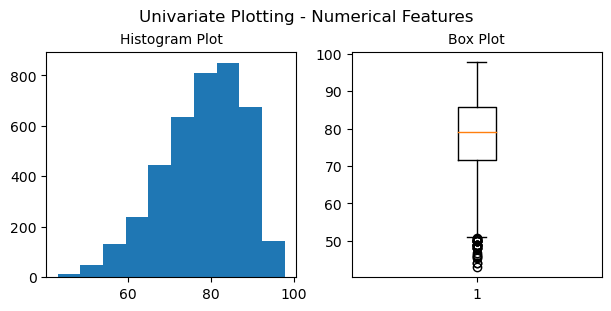

In [260]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), layout="constrained")
fig.suptitle("Univariate Plotting - Numerical Features")

axs[0].hist(df["10percentage"])
axs[0].set_title("Histogram Plot", fontsize="medium")

axs[1].boxplot(df["10percentage"])
axs[1].set_title("Box Plot", fontsize="medium")

plt.show()

In [267]:
df['JobCity'].replace({'Vizag':'Visakhapatnam','VIZAG':'Visakhapatnam','vizag':'Visakhapatnam','Trivandrum':'Thiruvananthapuram',' Trivandrum':'Thiruvananthapuram','TRIVANDRUM':'Thiruvananthapuram','Bengaluru':'Bangalore','ncr':'New Delhi','AM':'N/A','Nasikcity':'Nashik','Technopark, Trivandrum':'Technopark, Thiruvananthapuram','Trivandrum ':'Thiruvananthapuram','Gajiabaad':'Ghaziabad','orissa':'Odisha','pondi':'Pondicherry','pondy':'Pondicherry','punr':'Pune'},inplace=True)

In [268]:
#!pip install fuzzywuzzy

In [269]:
from fuzzywuzzy import process

def correct_spelling_errors(target_word,choices=['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
                                                 'Hyderabad', 'Noida', 'Kolkata', 'Pune','N/A','Jhansi',
                                                 'Bhubaneswar', 'Mumbai', 'New Delhi',
                                                 'Mangalore', 'Rewari', 'Ghaziabad', 'Bhiwadi', 'Mysore', 'Rajkot',
                                                 'Jaipur', 'Thane', 'Maharajganj', 'Thiruvananthapuram', 'Panchkula',
                                                 'Coimbatore', 'Dhanbad', 'Lucknow', 'Gandhinagar', 'Una', 'Daman and Diu',
                                                 'Nagpur', 'Bhagalpur', 'New Delhi/Jaisalmer', 'Ahmedabad', 'Kochi/Cochin',
                                                 'Bankura', 'Kanpur', 'Vijayawada', 'Beawar', 'Alwar', 'Siliguri', 'Raipur',
                                                 'Bhopal', 'Faridabad', 'Jodhpur', 'Udaipur', 'Muzaffarpur', 'Bulandshahar',
                                                 'Haridwar', 'Raigarh', 'Visakhapatnam', 'Jabalpur', 'Unnao', 'Aurangabad',
                                                 'Belgaum', 'Dehradun', 'Rudrapur', 'Jamshedpur', 'Dharamshala',
                                                 'Hissar', 'Ranchi', 'Madurai', 'Chandigarh', 'Australia', 'Cheyyar', 'Sonipat',
                                                 'Jagdalpur', 'Angul', 'Baroda', ' Ariyalur', 'Jowai','Kochi/Cochin, Chennai and Coimbatore',
                                                 'Neemrana', 'Tirupati', 'Calicut', 'Dubai', 'Ahmednagar', 'Nashik', 'Bellary', 'Ludhiana', 'Muzaffarnagar',
                                                 'Gagret', 'Indirapuram, Ghaziabad','Gwalior', 'Chennai & Mumbai', 'Rajasthan', 'Bareli',
                                                 'Hospet', 'Miryalaguda', 'Dharuhera', 'Meerut', 'Dehradun', 'Ganjam', 'Hubli',
                                                 'Agra', 'Trichy', 'Kudankulam , Tarapur', 'Ongole', 'Sambalpur', 'Pondicherry',
                                                 'Sadulpur', 'Bikaner', 'Vadodara', 'India', 'Asansol',
                                                 'Tirunelvelli', 'Ernakulam', 'Bilaspur', 'Chandrapur', 'Nanded','Dharmapuri', 'Vandavasi', 'Rohtak',
                                                 'Patna','Salem','Technopark, Thiruvananthapuram', 'Bharuch', 'Tornagallu', 'Jaspur', 'Burdwan',
                                                 'Shimla', 'Jammu', 'Shahdol','Muvattupuzha', 'Al Jubail', 'Kalmar, Sweden','Secunderabad',
                                                 'Ratnagiri', 'Jhajjar', 'Gulbarga', 'Nalagarh', 'Jeddah', 'Jamnagar', 'Gonda',
                                                 'Odisha', 'Kharagpur', 'Navi Mumbai , Hyderabad', 'Joshimath', 'Bathinda', 'Johannesburg', 'Kala Amb',
                                                 'Karnal','London', 'Kota', 'Baddi', 'Nagari', 'Mettur', 'Durgapur', 'Bahadurgarh',
                                                 'Rayagada, Odisha', 'Kakinada', 'Surat', 'Kurnool', 'Kolhapur', 'Bhilai', 'Nellore', 'Meerut',
                                                 'Sahibabad', 'Howrah', 'Trichur', 'Ambala', 'Khopoli', 'Kerala', 'Roorkee', 'Allahabad',
                                                 'Delhi/NCR', 'Jalandhar', 'Manesar', 'Vapi', 'Pilani', 'Ras Al Khaimah', 'Bihar', 'Singaruli', 'Mohali',
                                                 'Phagwara', 'Baripada', 'Yamunanagar', 'Shahibabad', 'Sampla', 'Guwahati', 'Rourkela', 'Vellore', 'Dausa',
                                                 'Latur', 'Mainpuri', 'Rae Bareli', 'Dammam', 'Haldia', 'Patiala', 'Gorakhpur',
                                                 'Karad', 'Rajpura', 'Haryana'], threshold=80):
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word

In [270]:
df['JobCity']=df['JobCity'].apply(correct_spelling_errors)

In [271]:
df['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Noida', 'Kolkata', 'Pune', '-1', 'Mohali', 'Jhansi',
       'New Delhi', 'Bhubaneswar', 'Mumbai', 'Mangalore', 'Rewari',
       'Ghaziabad', 'Bhiwadi', 'Mysore', 'Rajkot', 'Jaipur', 'Thane',
       'Maharajganj', 'Thiruvananthapuram', 'Panchkula', 'Coimbatore',
       'Dhanbad', 'Lucknow', 'Gandhinagar', 'Una', 'Daman and Diu',
       'Visakhapatnam', 'Nagpur', 'Bhagalpur', 'New Delhi/Jaisalmer',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Kanpur', 'Vijayawada',
       'Beawar', 'Alwar', 'Siliguri', 'Raipur', 'Bhopal', 'Faridabad',
       'Jodhpur', 'Udaipur', 'Muzaffarpur', 'Bulandshahar', 'Haridwar',
       'Raigarh', 'Jabalpur', 'Unnao', 'Aurangabad', 'Belgaum',
       'Dehradun', 'Rudrapur', 'Jamshedpur', 'Dharamshala', 'Hissar',
       'Ranchi', 'Madurai', 'Chandigarh', 'Australia', 'Cheyyar',
       'Sonipat', 'Nagari', 'Jagdalpur', 'Angul', 'Baroda', ' Ariyalur',
       'Jowai', 'Kochi/Cochin

## Univariate Analysis

### For Numerical Columns

#### KDE

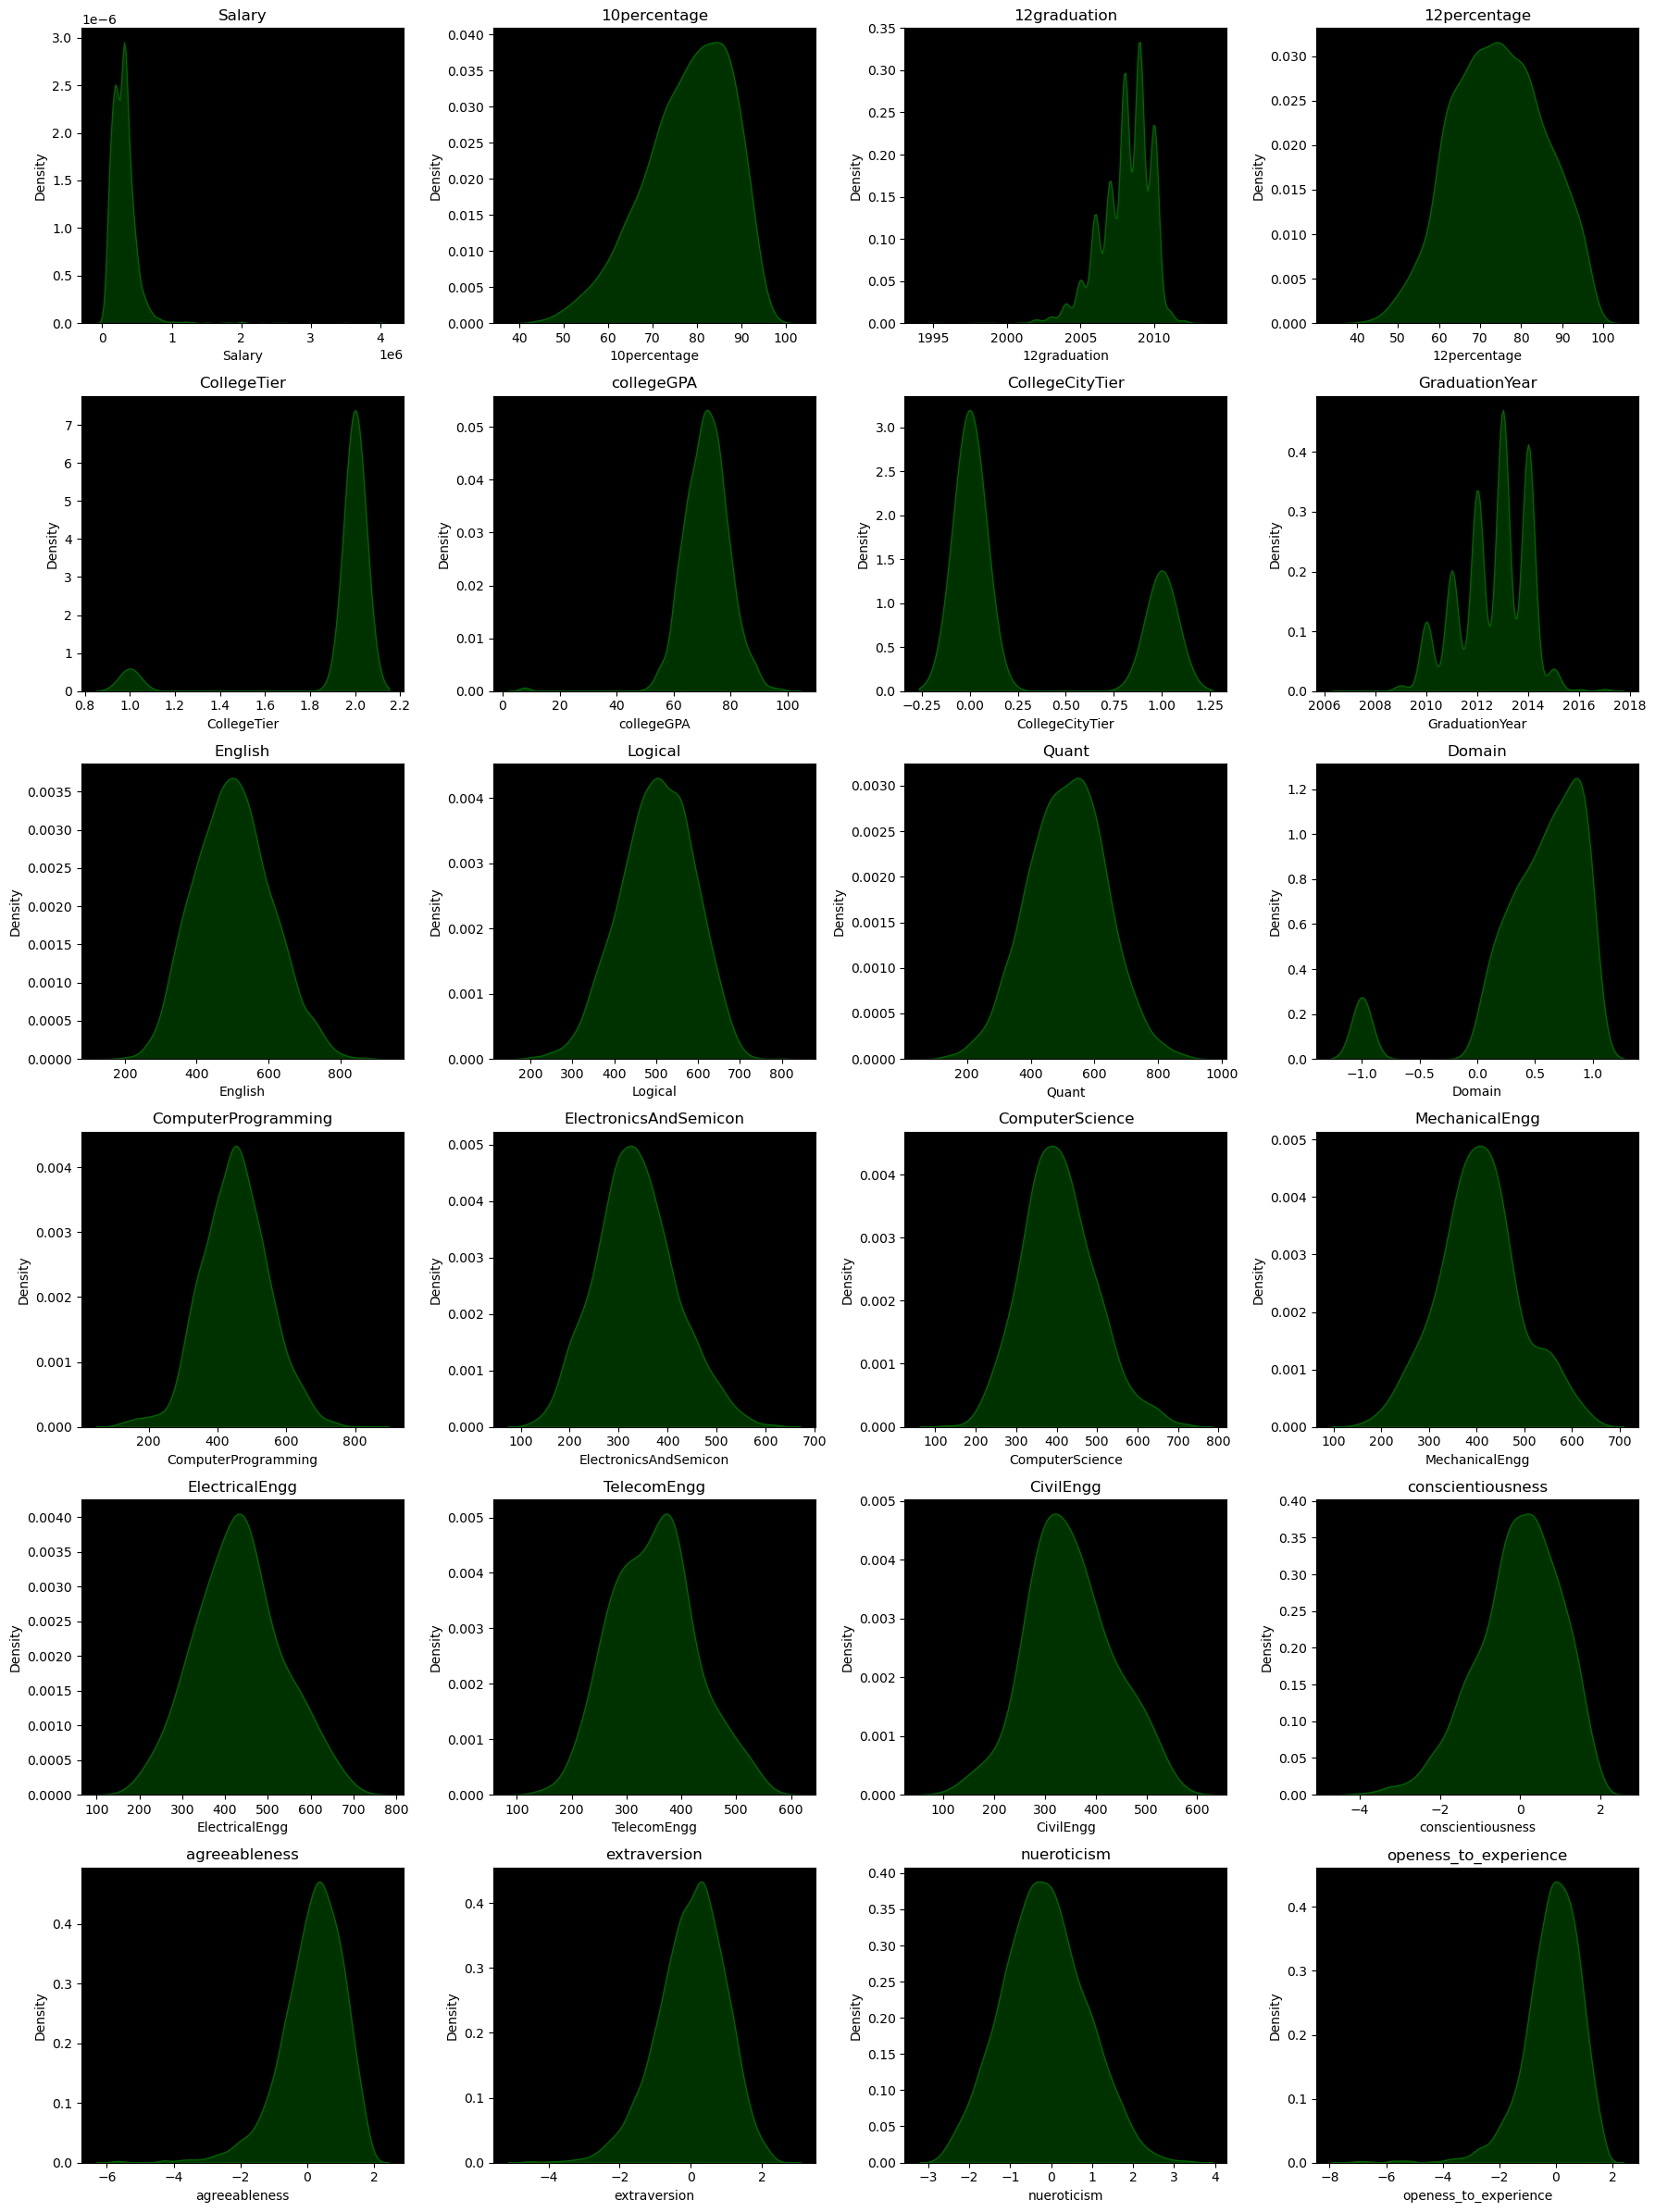

In [272]:
fig, axes = plt.subplots(6, 4, figsize=(18, 24))
axes = axes.flatten()
for i, column in enumerate(col):
    sns.kdeplot(data=df[column], ax=axes[i], label=column,fill=True, color='darkgreen', alpha=0.5)
    axes[i].set_title(column)  # Set subplot title
    axes[i].set_facecolor('black')
for ax in axes[len(col):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

+ These are the KDE(Kernel Density Estimation) plots for numerical columns
+ We can see the trends for different columns.

#### Histograms

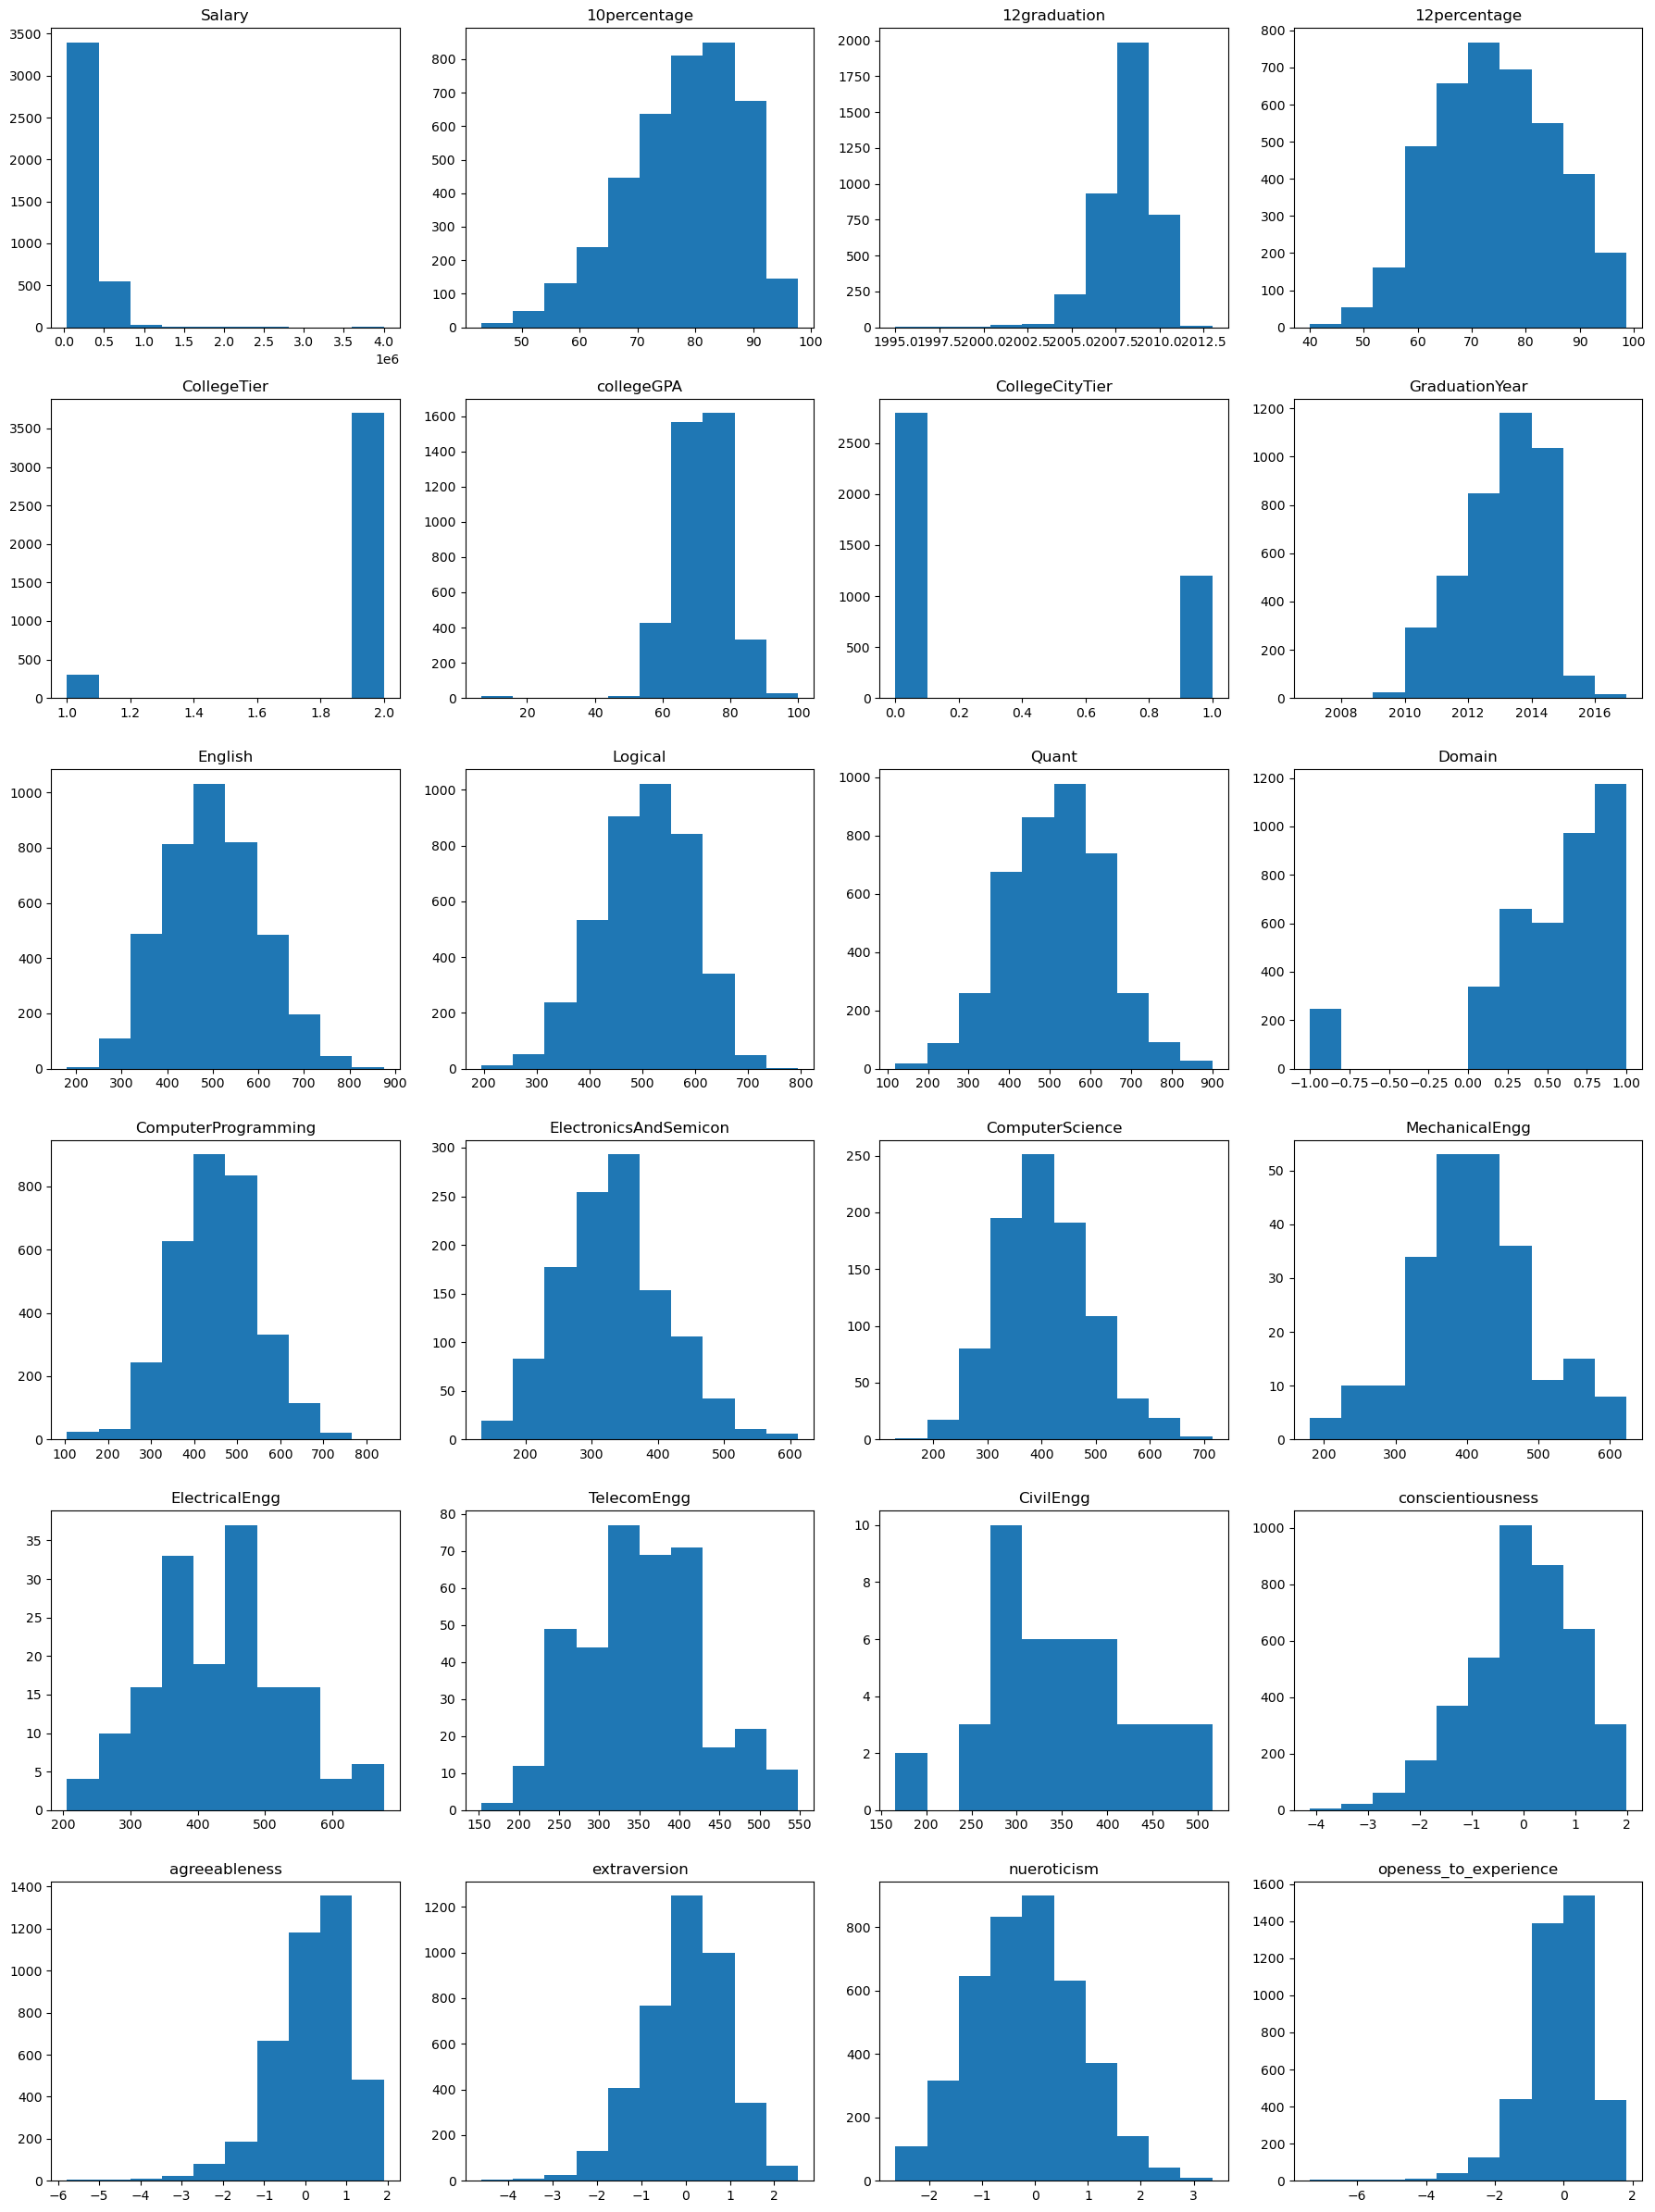

In [273]:
fig, axes = plt.subplots(6, 4, figsize=(18, 24))
axes = axes.flatten()
for i, column in enumerate(col):
    axes[i].hist(df[column], bins=10)
    axes[i].set_title(column)
for ax in axes[len(col):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

+ These are the Histogram plots for Numerical columns

#### Box-Plots

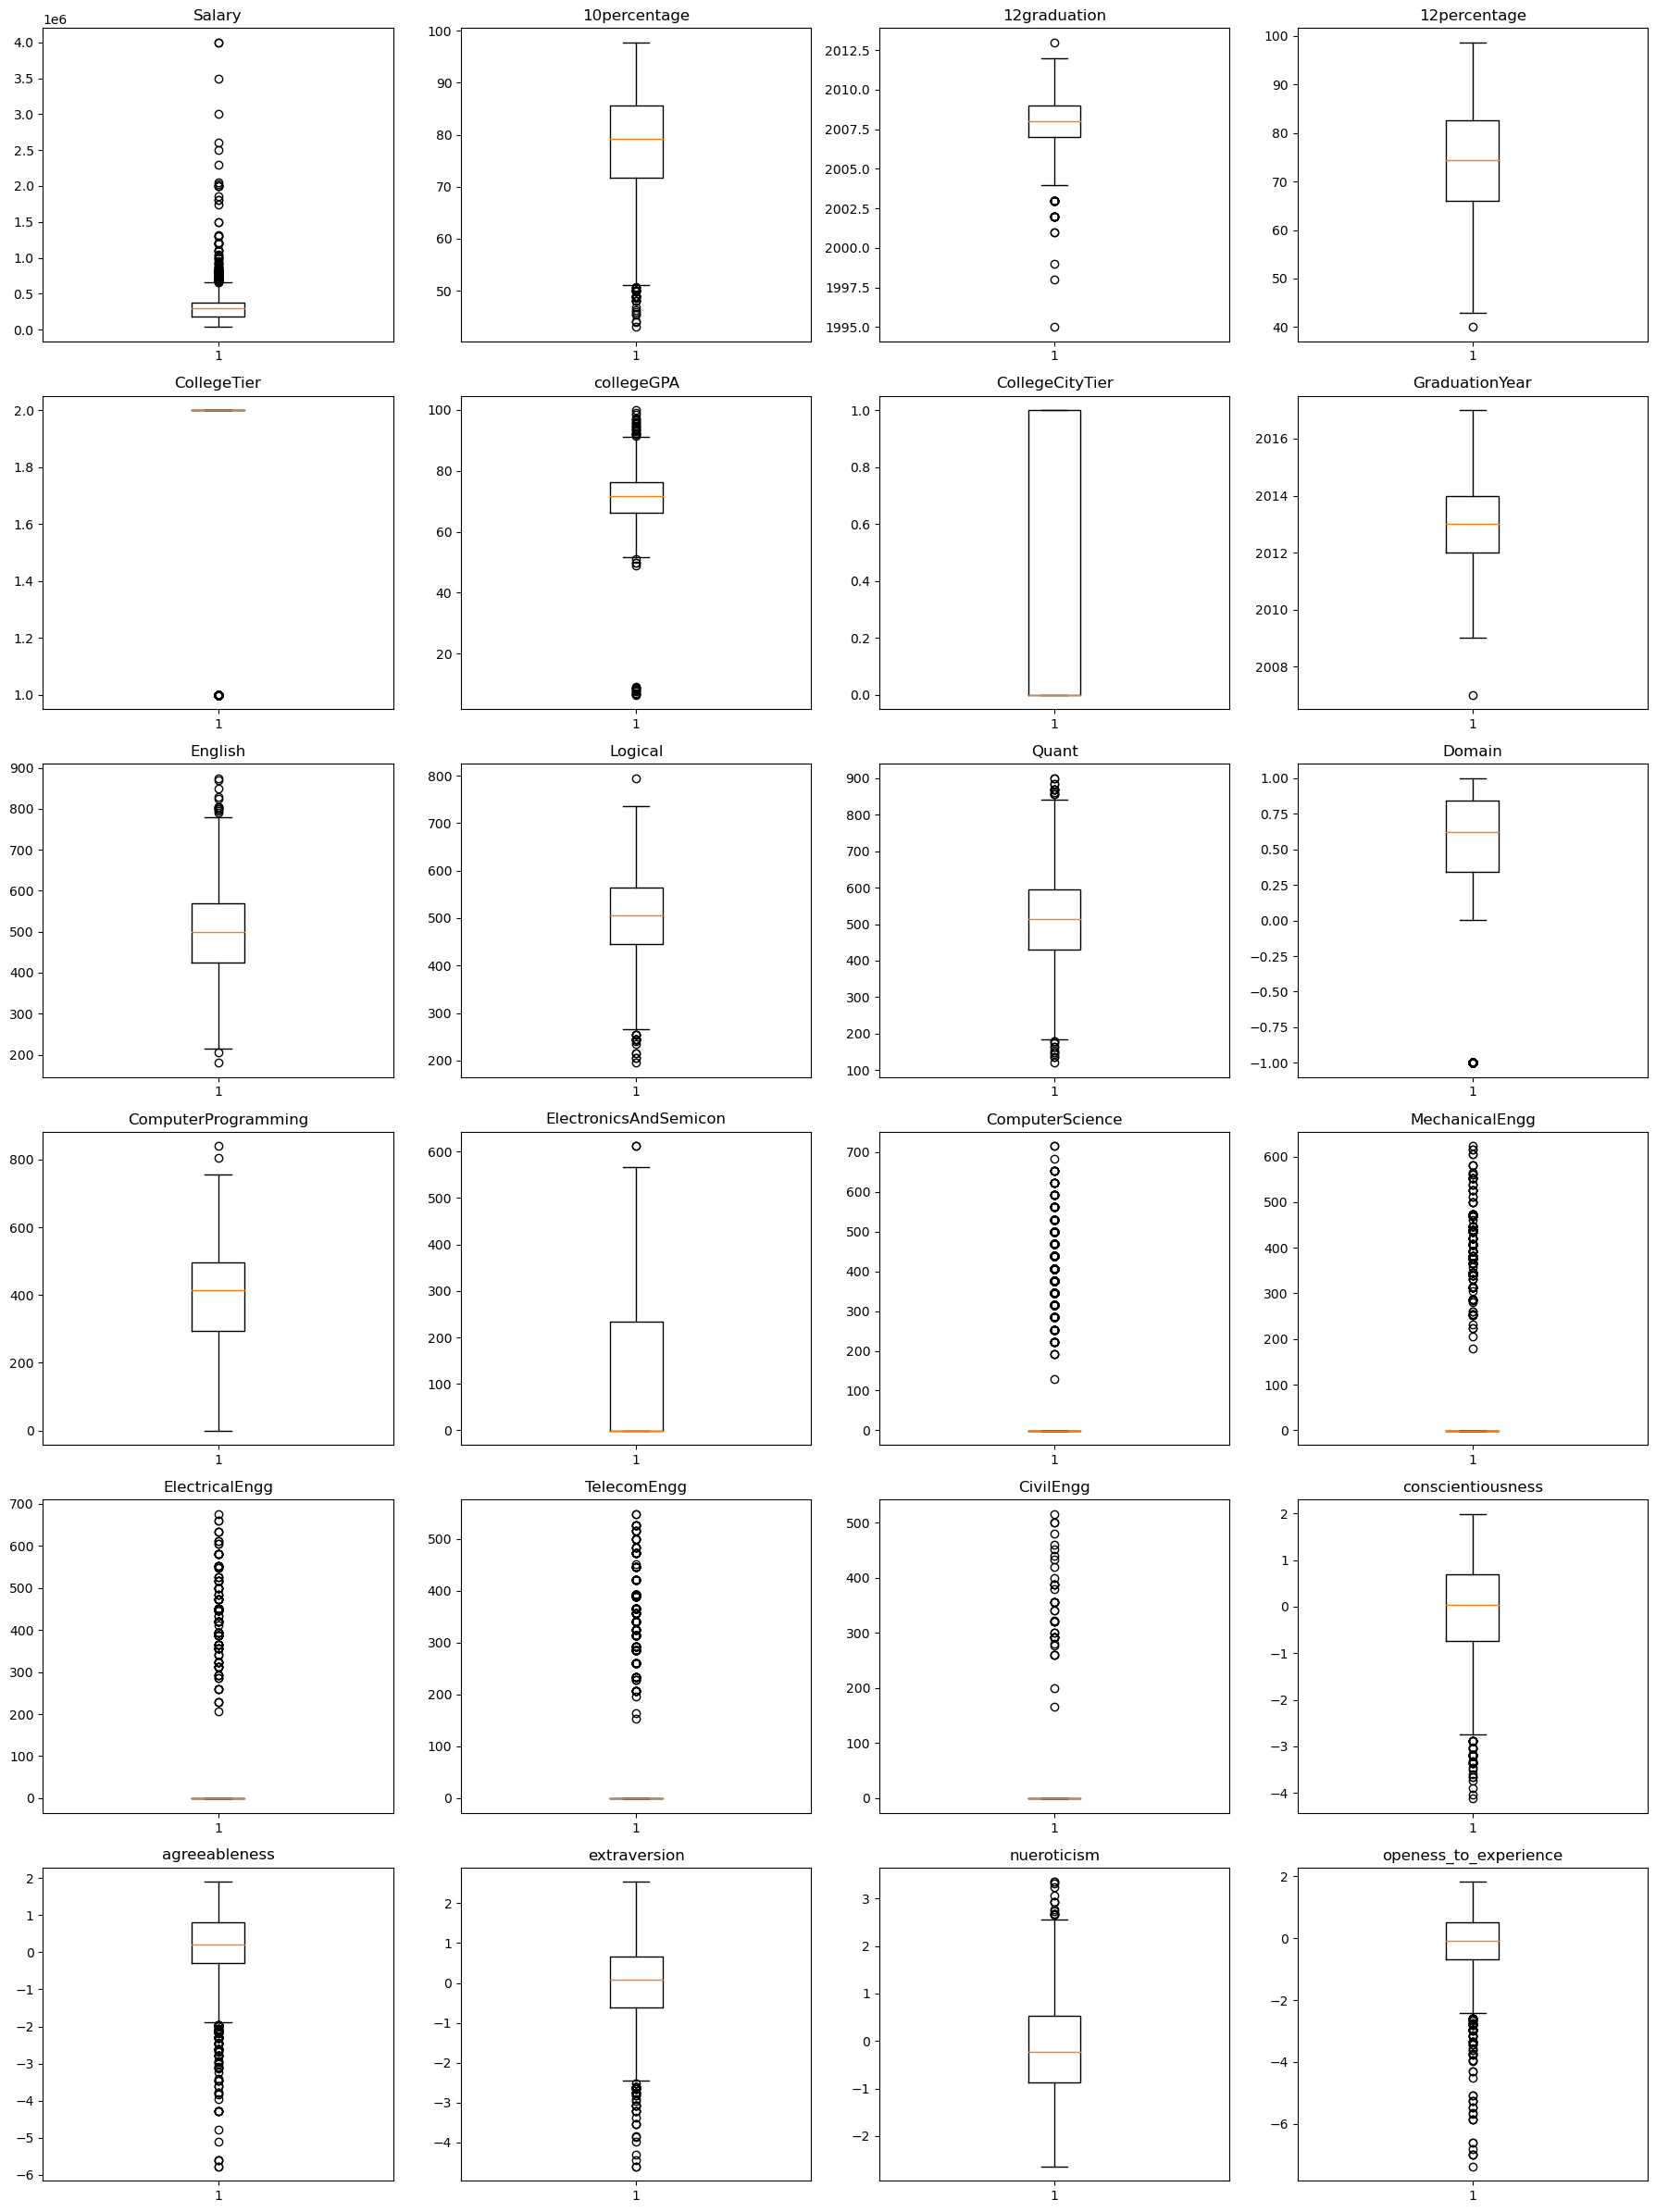

In [274]:
fig, axes = plt.subplots(6, 4, figsize=(18, 24))
df_filled = df.fillna(-1)
axes = axes.flatten()
for i, column in enumerate(col):
    axes[i].boxplot(df_filled[column])
    axes[i].set_title(column)
for ax in axes[len(col):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

+ These are the box plots reperesenting the data and outliers(if available even after cleaning).

### For Categorical columns

In [275]:
pd.Timestamp.now()

Timestamp('2024-02-23 09:58:31.864478')

In [276]:
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
datetime.now()

datetime.datetime(2024, 2, 23, 9, 58, 31, 887822)

In [277]:
df['DOJ']=pd.to_datetime(df['DOJ'])

In [278]:
df['DOB']=pd.to_datetime(df['DOB'])

In [279]:
df['DOL']=df['DOL'].replace('present',pd.Timestamp.now())

In [280]:
df['DOL']=pd.to_datetime(df['DOL'])

In [281]:
df['JobCity'].value_counts(dropna=False)

Bangalore              685
-1                     461
Noida                  420
Hyderabad              370
Pune                   328
                      ... 
Nanded                   1
New Delhi/Jaisalmer      1
Bankura                  1
Ernakulam                1
Haryana                  1
Name: JobCity, Length: 195, dtype: int64

In [282]:
df['JobCity']=df['JobCity'].replace('-1','N/A')#.value_counts(dropna=False)

In [283]:
df['JobCity'].value_counts(dropna=False)

Bangalore              685
N/A                    462
Noida                  420
Hyderabad              370
Pune                   328
                      ... 
Dharmapuri               1
Nanded                   1
New Delhi/Jaisalmer      1
Bankura                  1
Haryana                  1
Name: JobCity, Length: 194, dtype: int64

In [284]:
df['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', '0', 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'm

In [285]:
df['10board']=df['10board'].replace('0','N/A')

In [286]:
df['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', '0', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate s

In [287]:
df['12board']=df['12board'].replace('0','N/A')

In [288]:
df['Designation'].value_counts(dropna=False)

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     117
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

In [289]:
board10=list(df['10board'].unique())

In [290]:
board12=list(df['12board'].unique())

In [291]:
state_10=[]
cbse_10=[]
icse_10=[]
for i in board10:
    if i in ('cbse','cbse[gulf_zone]','cbse ','cbsc','new delhi','board of secondary education'):
        cbse_10.append(i)
    elif i in ('icse','icse board','cicse'):
        icse_10.append(i)
    else:
        state_10.append(i)

In [292]:
for i in state_10:
    df['10board'].replace(i,'State',inplace=True)
for i in cbse_10:
    df['10board'].replace(i,'CBSE',inplace=True)
for i in icse_10:
    df['10board'].replace(i,'ICSE',inplace=True)

In [293]:
state_12=[]
cbse_12=[]
icse_12=[]
for i in board12:
    if i in ('cbse','cbese ','cbsc','new delhi','cbse board','bice'):
        cbse_12.append(i)
    elif i in ('icse','ise board','cicse','isce','isc'):
        icse_12.append(i)
    else:
        state_12.append(i)

In [294]:
for i in state_12:
    df['12board'].replace(i,'State',inplace=True)
for i in cbse_12:
    df['12board'].replace(i,'CBSE',inplace=True)
for i in icse_12:
    df['12board'].replace(i,'ICSE',inplace=True)

In [295]:
df['10board'].value_counts()

State    2298
CBSE     1416
ICSE      283
Name: 10board, dtype: int64

In [296]:
df['12board'].value_counts()

State    2419
CBSE     1402
ICSE      176
Name: 12board, dtype: int64

<Axes: >

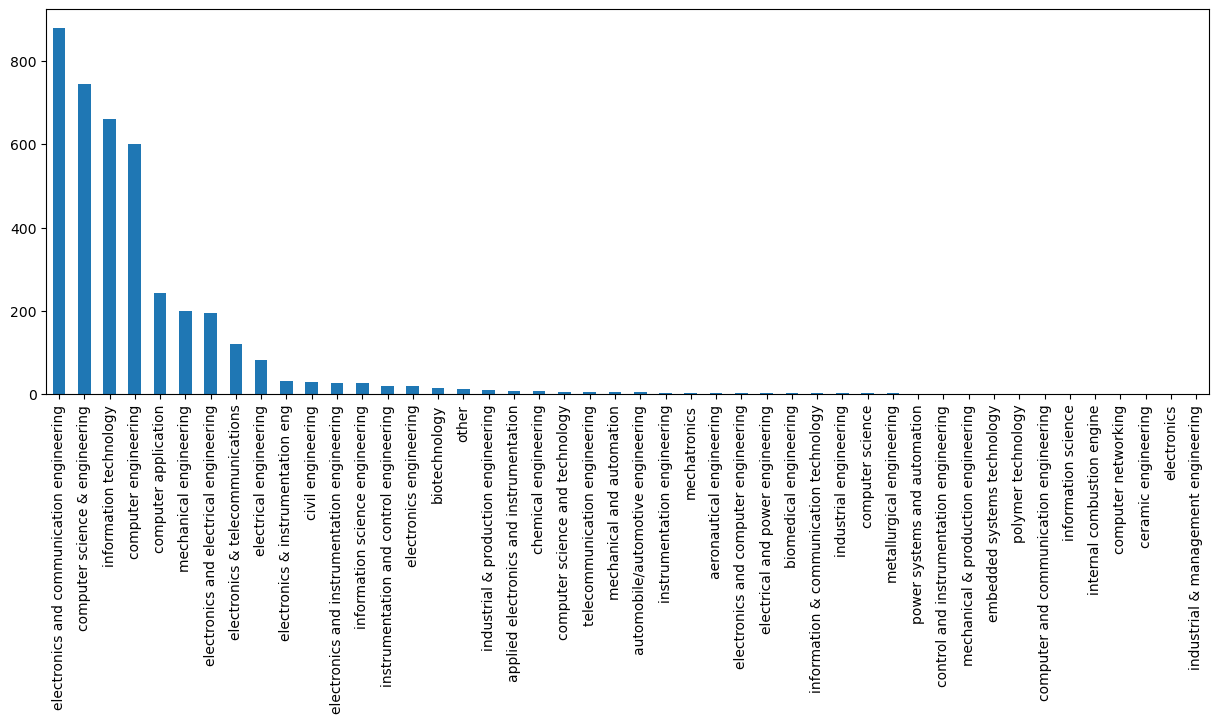

In [298]:
specialization_freq = df['Specialization'].value_counts()
specialization_freq.plot(kind='bar', figsize=(15,5))

<Axes: >

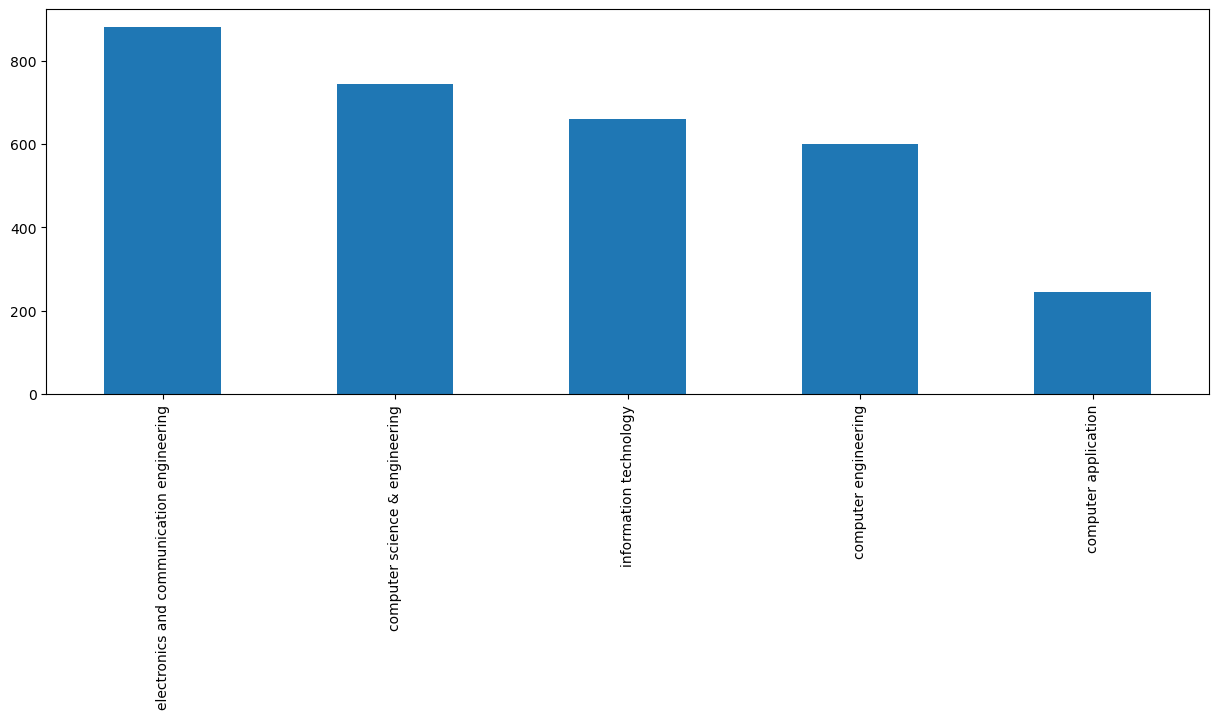

In [299]:
specialization_freq[0:5].plot(kind='bar', figsize=(15,5))

In [359]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CSE',
 'information technology' : 'CSE' ,
 'computer engineering' : 'CSE',
 'computer application' : 'CSE',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CSE',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CSE',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CSE',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CSE',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CSE',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CSE',
 'information science' : 'CSE',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

In [360]:
df['Specialization'] = df['Specialization'].map(specialization_map)

In [300]:
df['DOJ']=pd.to_datetime(df['DOJ']).dt.date
df['DOL']=pd.to_datetime(df['DOL']).dt.date

In [301]:
df['DOJ']=pd.to_datetime(df['DOJ'])
df['DOL']=pd.to_datetime(df['DOL'])

In [302]:
df['Age']=df['DOJ']-df['DOB']

In [303]:
df['Age']=(df['Age']//365).astype('str')

In [304]:
df['Age']=df['Age'].apply(lambda x: int(re.findall(r'[0-9]+',x)[0]))

In [305]:
df['Age']

0       22
1       23
2       21
3       21
4       23
        ..
3993    24
3994    20
3995    22
3996    22
3997    21
Name: Age, Length: 3997, dtype: int64

In [306]:
df['Experience']=((df['DOL'].dt.date-df['DOJ'].dt.date)//365).astype('str')

In [307]:
df['Experience']=df['Experience'].apply(lambda x: int(re.findall(r'[0-9]+',x)[0]))

In [308]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,Experience
0,203097,420000.0,2012-06-01,2024-02-23,senior quality engineer,Bangalore,f,1990-02-19,84.3,State,2007,95.8,State,1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9737,0.8128,0.5269,1.35490,-0.4455,22,11
1,579905,500000.0,2013-09-01,2024-02-23,assistant manager,Indore,m,1989-10-04,85.4,CBSE,2007,85.0,CBSE,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,NaN,466.0,NaN,NaN,NaN,NaN,NaN,-0.7335,0.3789,1.2396,-0.10760,0.8637,23,10
2,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992-08-03,85.0,CBSE,2010,68.2,CBSE,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395.0,NaN,NaN,NaN,NaN,NaN,NaN,0.2718,1.7109,0.1637,-0.86820,0.6721,21,9
3,267447,1100000.0,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989-12-05,85.6,CBSE,2007,83.6,CBSE,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0464,0.3448,-0.3440,-0.40780,-0.9194,21,12
4,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,CBSE,2008,76.8,CBSE,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,NaN,233.0,NaN,NaN,NaN,NaN,NaN,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,23,1


In [309]:
cat=list(df.select_dtypes(include=['category','object']).columns) ## We are not considering ID's since they don't have any meaning or relation to make analysis on the data.

In [310]:
cat

['Designation',
 'JobCity',
 'Gender',
 '10board',
 '12board',
 'Degree',
 'Specialization',
 'CollegeState']

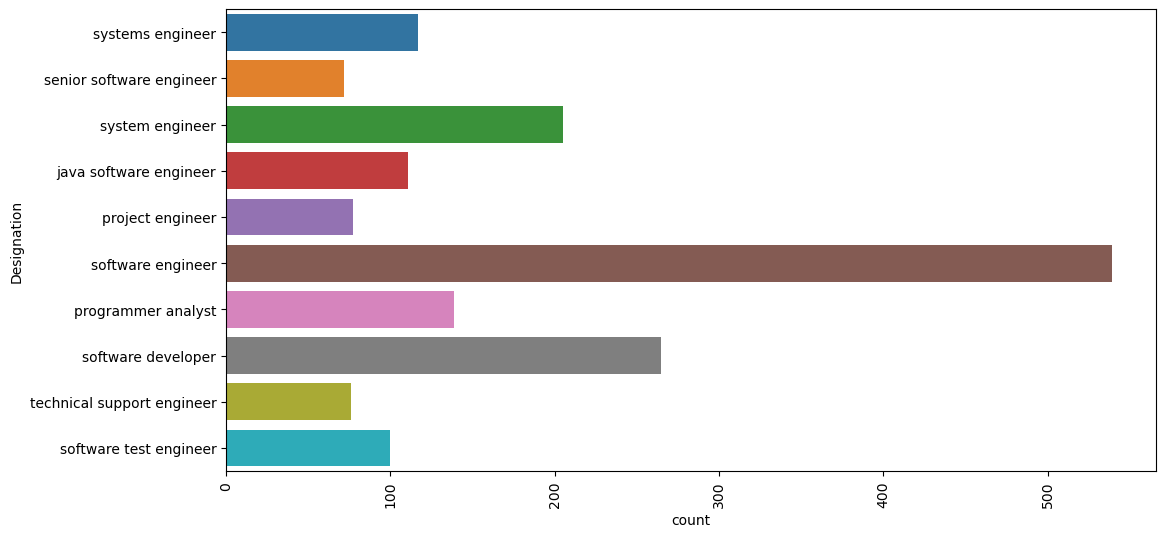

In [128]:
top_values = df['Designation'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(y='Designation', data=df[df['Designation'].isin(top_values)])
plt.xticks(rotation=90)
plt.show()

### Observations: Most of the applicants for AMCAT 2015 are working as Software Engineer.

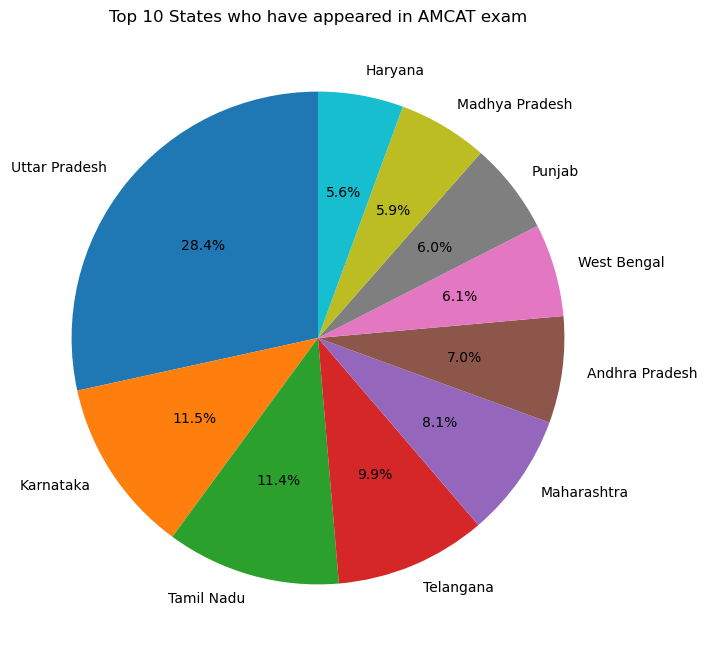

In [131]:
top_values = df['CollegeState'].value_counts().nlargest(10)
plt.figure(figsize=(8,8))
plt.pie(top_values, labels=top_values.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 States who have appeared in AMCAT exam')
plt.show()


### Observations: Most of the people who have appeared for AMCAT-2015 are from Uttar Pradesh

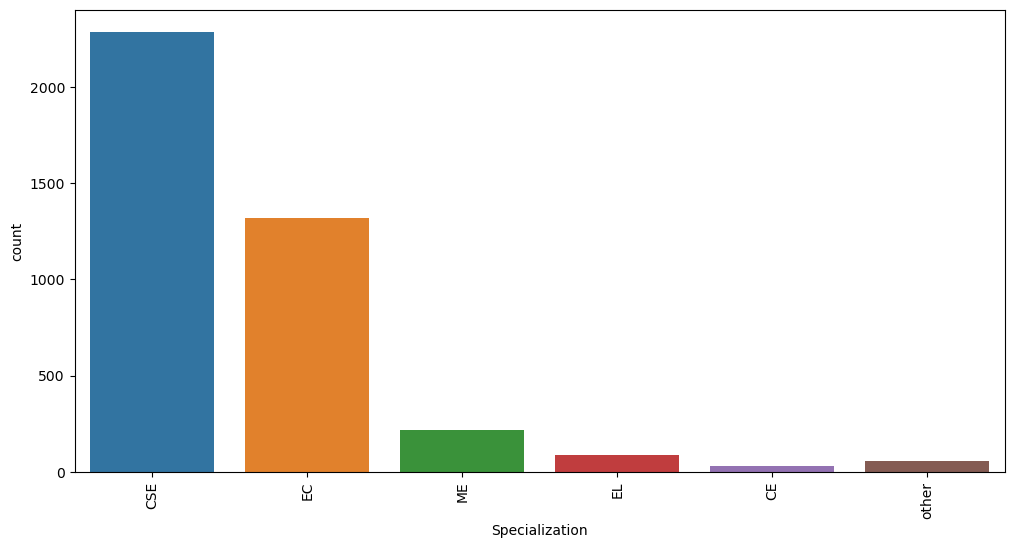

In [387]:
plt.figure(figsize=(12, 6))  # Adjust the figure size
sns.countplot(x='Specialization', data=df)
plt.xticks(rotation=90)
plt.show()

### Observations: Most of the students are from Computer Science background.

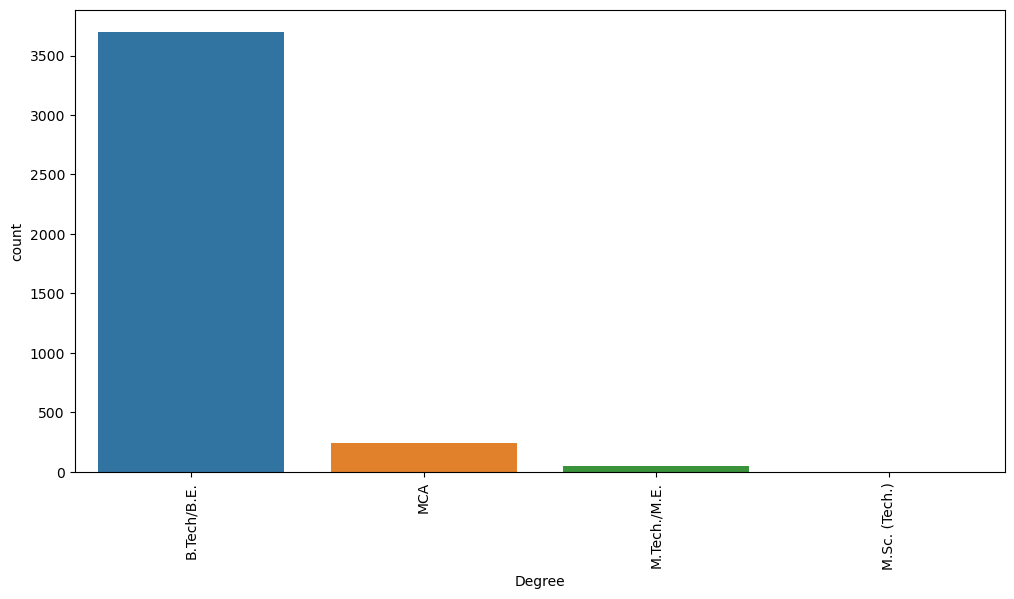

In [132]:
plt.figure(figsize=(12, 6))  # Adjust the figure size
sns.countplot(x='Degree', data=df)
plt.xticks(rotation=90)
plt.show()

### Observations: B.Tech/B.E students have predominantly appeared for AMCAT exam.

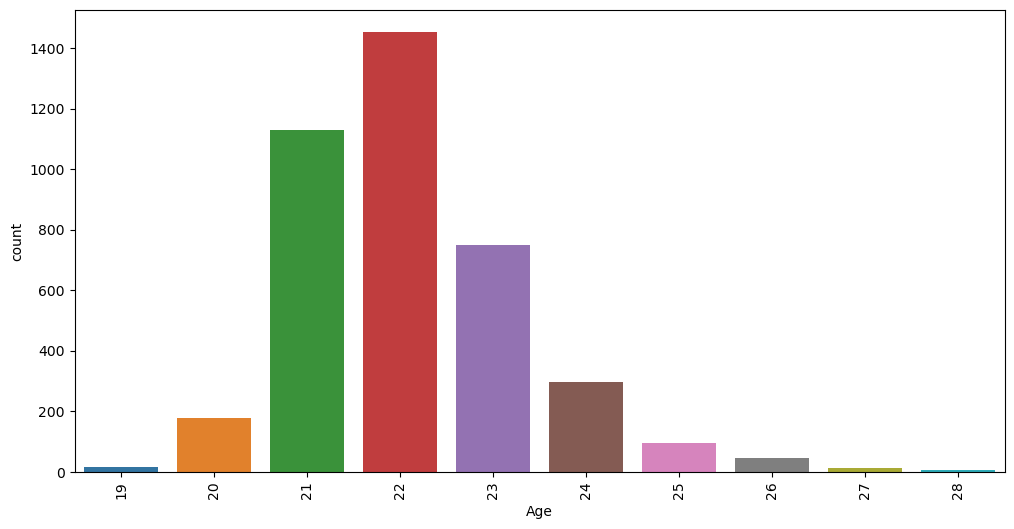

In [152]:
top_values = df['Age'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', data=df[df['Age'].isin(top_values)])
plt.xticks(rotation=90)
plt.show()

### Observations: Most of the working professionals are of age nearly 22 years.

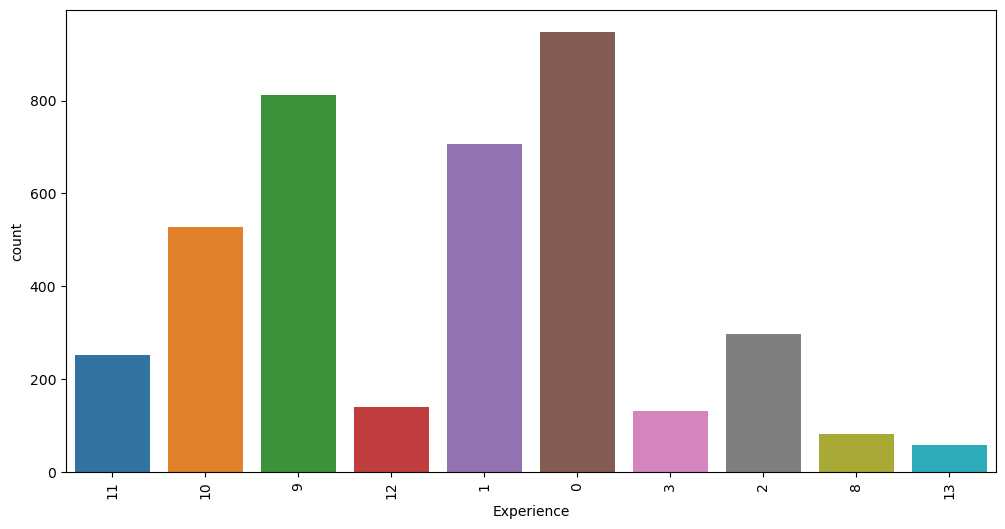

In [157]:
top_values = df['Experience'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x='Experience', data=df[df['Experience'].isin(top_values)])
plt.xticks(rotation=90)
plt.show()

### Observations: From this bar plot we can infer that most of the job-holders are freshers with 0 years of experience.

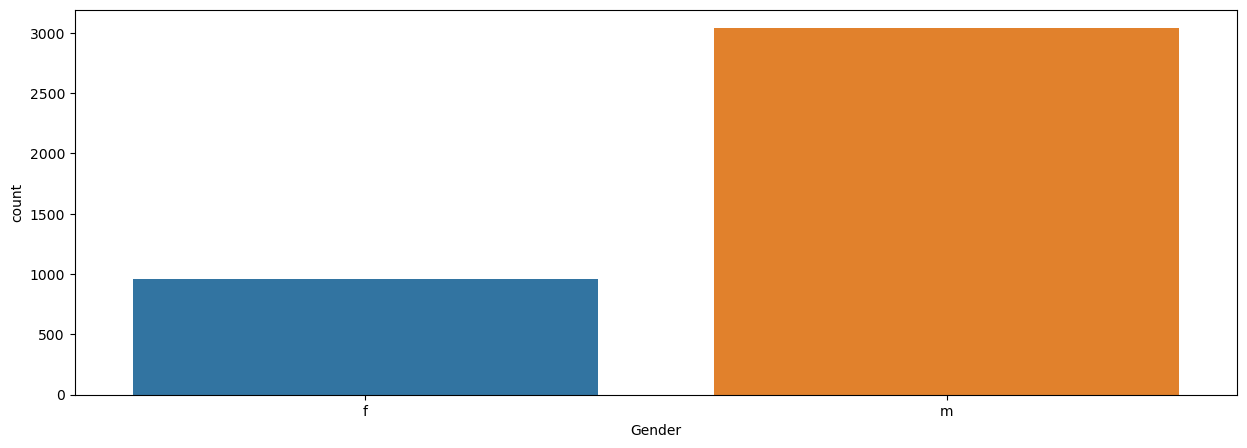

In [166]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='Gender')
plt.show()

### Observations: Males have majorly appeared for the AMCAT exam.

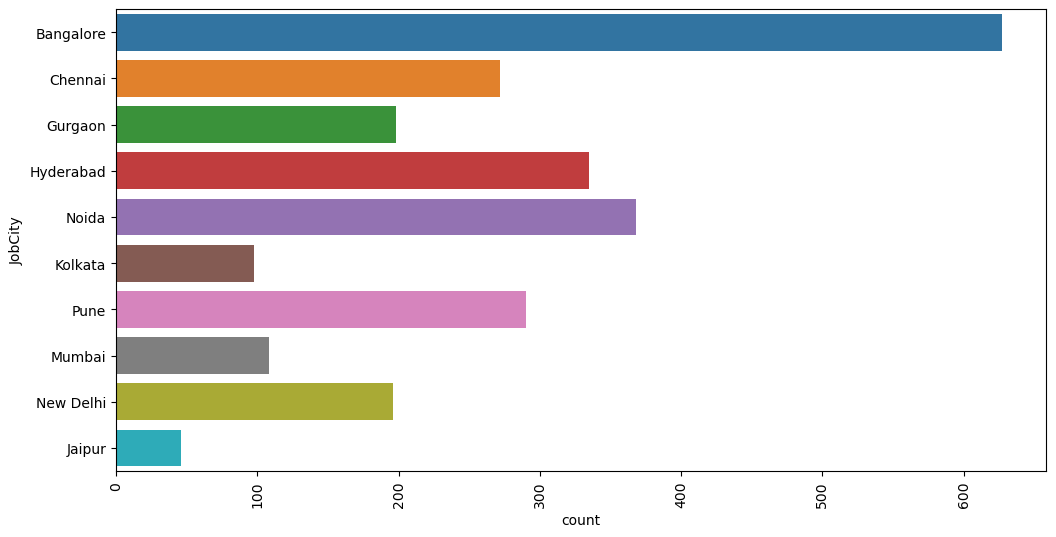

In [139]:
top_values = df.loc[df['JobCity']!='N/A','JobCity'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(y='JobCity', data=df[df['JobCity'].isin(top_values)])
plt.xticks(rotation=90)
plt.show()

### Observations: We can say that most of the job-holders are from Bangalore.

## Bivariate & Multivariate Analysis

In [158]:
df.groupby('Gender')['conscientiousness', 'agreeableness', 'extraversion','nueroticism', 'openess_to_experience'].mean()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.121034,0.292444,0.012173,-0.179358,0.038246
m,-0.088228,0.100475,-0.000101,-0.165719,-0.193264


+ Observations: From this we can say that, females are overall having a better personality traits compared to males i.e.,'conscientiousness', 'agreeableness', 'extraversion','nueroticism', 'openess_to_experience' 

In [159]:
pd.DataFrame(df.groupby('Gender')['Salary'].mean())

,Salary
Gender,
f,294937.304075
m,311711.842105


+ We can infer from this that Males are having a better salary-pay then females on an average

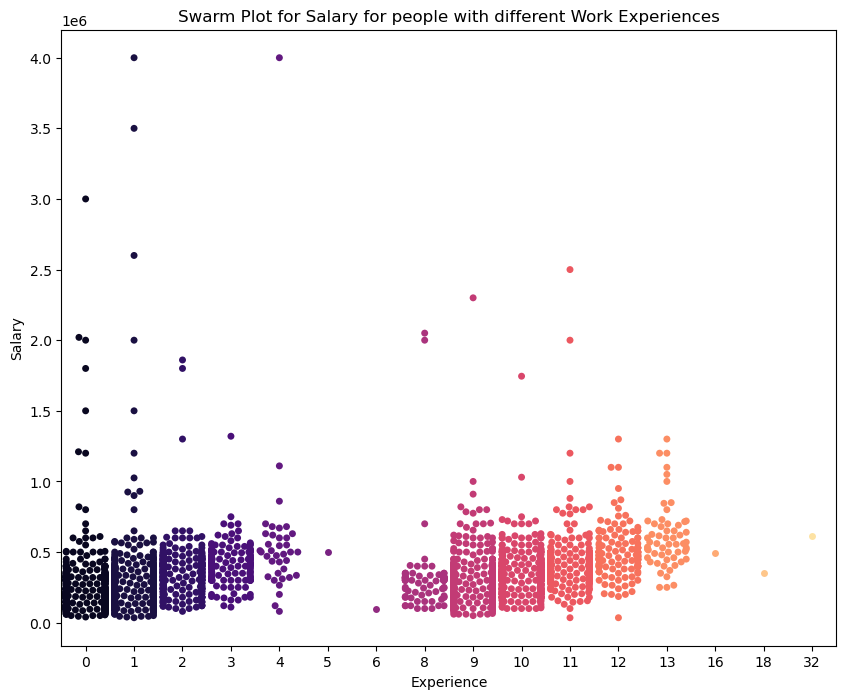

In [326]:
plt.figure(figsize=(10, 8))

sns.swarmplot(x="Experience", y="Salary", data=df,palette='magma')

plt.title('Swarm Plot for Salary for people with different Work Experiences')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

### Observations: This plot represents the salaries of different experienced people

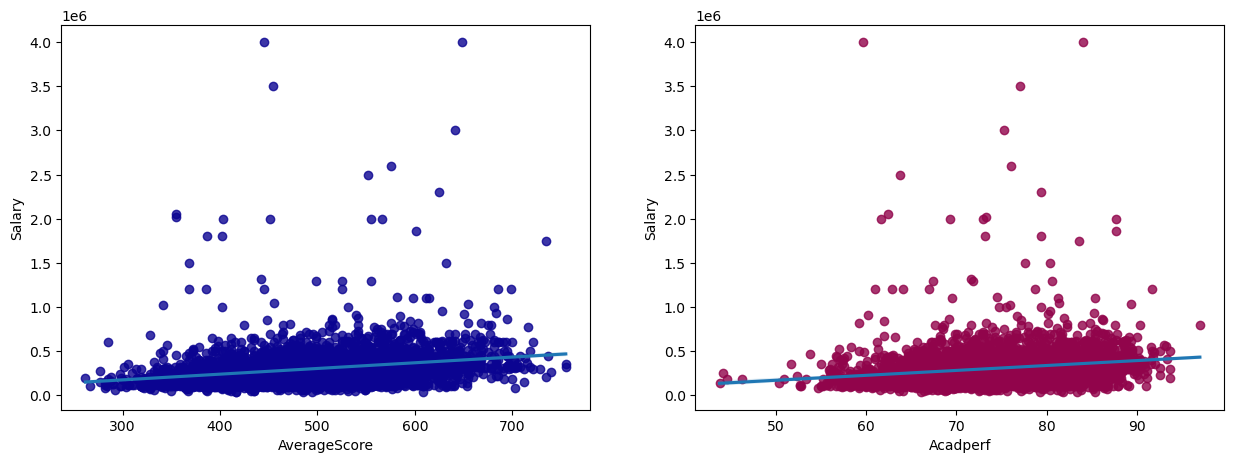

In [355]:
plt.figure(figsize=(15, 5))

# Calculate Average Score and Academic Performance
df['AverageScore'] = (df['Logical'] + df['Quant'] + df['English']) / 3
df['Acadperf'] = (df['10percentage'] + df['12percentage'] + df['collegeGPA']) / 3

# Plotting the regression plots with color
plt.subplot(1, 2, 1)
sns.regplot(x='AverageScore', y='Salary', data=df, scatter_kws={"color": "#0b0491"})
plt.subplot(1, 2, 2)
sns.regplot(x='Acadperf', y='Salary', data=df, scatter_kws={"color": "#91044b"})
plt.show()

### Observation:From this we can say that there is some positive correlation between Average Score and Acadperf

In [341]:
box_city=df[df['JobCity']!='N/A']['JobCity'].value_counts(ascending=False)[0:5].reset_index()

In [345]:
box_city.rename({'index':'JobCity','JobCity':'Count'},inplace=True,axis=1)

In [346]:
box_city

,JobCity,Count
0,Bangalore,685
1,Noida,420
2,Hyderabad,370
3,Pune,328
4,Chennai,313


In [348]:
df_box=pd.merge(box_city,df,on='JobCity',how='inner')

In [351]:
df_box.head()

,JobCity,Count,ID,Salary,DOJ,DOL,Designation,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,Experience
0,Bangalore,685,203097,420000.0,2012-06-01,2024-02-23,senior quality engineer,f,1990-02-19,84.30,State,2007,95.8,State,1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9737,0.8128,0.5269,1.3549,-0.4455,22,11
1,Bangalore,685,947847,300000.0,2014-08-01,2015-05-01,java software engineer,m,1993-02-01,86.08,State,2010,67.5,State,314,2,B.Tech/B.E.,computer science & engineering,72.98,314,1,Karnataka,2014,590,435,380,0.356536,405.0,NaN,346.0,NaN,NaN,NaN,NaN,1.7081,-0.1054,-1.0379,-2.0092,-1.0872,21,0
2,Bangalore,685,912934,400000.0,2014-07-01,2015-07-01,mechanical engineer,m,1992-05-27,92.00,CBSE,2010,91.0,CBSE,1757,1,B.Tech/B.E.,mechanical engineering,8.58,1757,0,Tamil Nadu,2016,545,555,590,0.829585,NaN,NaN,NaN,469.0,NaN,NaN,NaN,-0.0154,1.2114,0.0100,0.1459,1.2470,22,1
3,Bangalore,685,87291,600000.0,2011-04-01,2015-04-01,senior php developer,m,1989-06-24,88.60,State,2006,83.7,State,403,2,B.Tech/B.E.,computer engineering,74.90,403,0,Madhya Pradesh,2010,565,455,565,0.765674,485.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0464,0.8128,0.0914,0.1798,0.0284,21,4
4,Bangalore,685,1279958,300000.0,2013-07-01,2024-02-23,java software engineer,m,1992-07-02,81.20,State,2008,79.9,State,64,2,B.Tech/B.E.,instrumentation and control engineering,67.67,64,0,Uttar Pradesh,2013,395,565,645,-1.000000,495.0,NaN,376.0,NaN,NaN,NaN,NaN,0.7027,0.7119,0.0100,-0.9950,0.6721,21,10


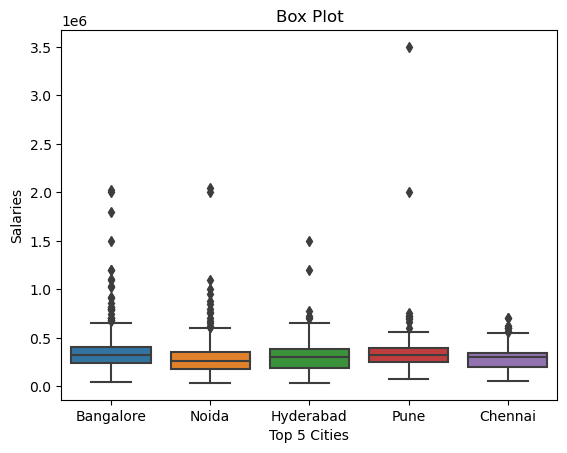

In [352]:
sns.boxplot(x='JobCity', y='Salary', data=df_box)
plt.xlabel('Top 5 Cities')
plt.ylabel('Salaries')
plt.title('Box Plot')
plt.show()

### Observations: Top 5 Cities(based on workforce) and their salaries

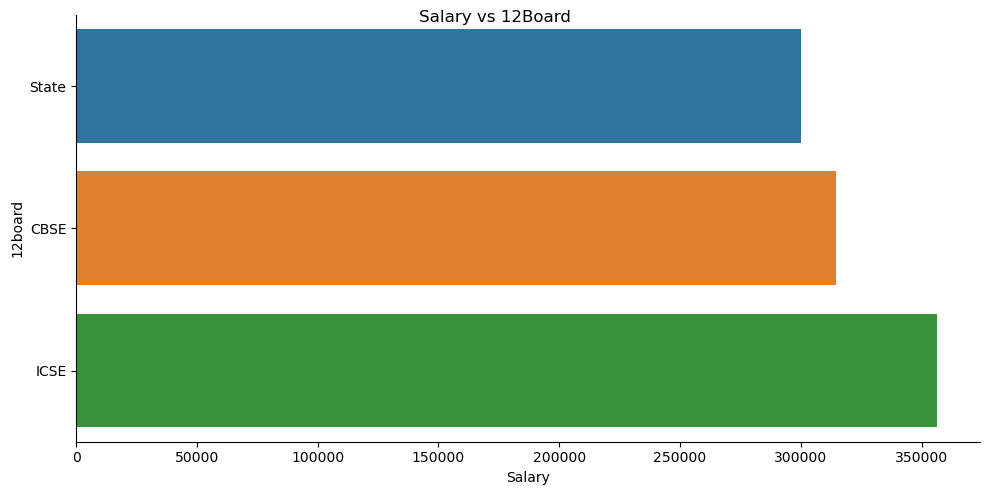

In [165]:
sns.catplot(x='Salary', y='12board', kind='bar', data=df, ci=None, height=5, aspect=2)
plt.suptitle('Salary vs 12Board')
plt.show()

### Observations: From this plot we can say that students who have passed out of 12th board of ICSE

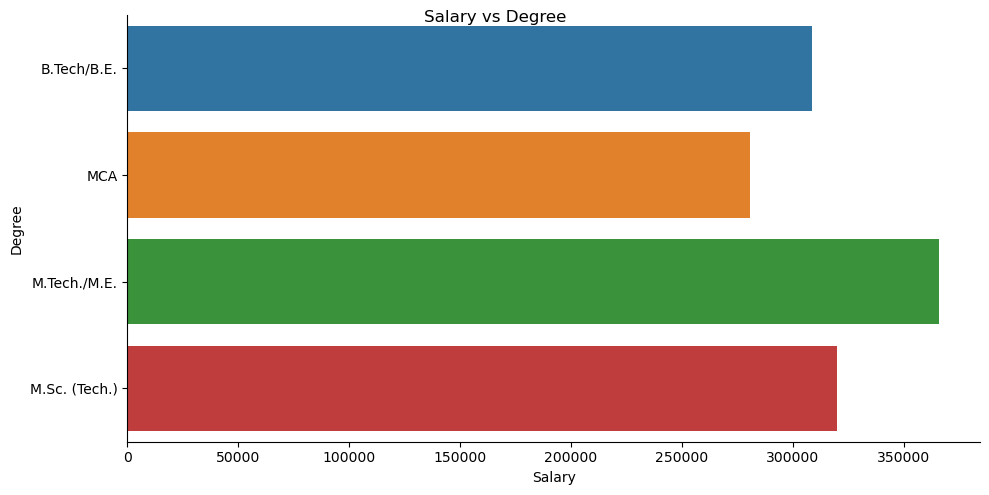

In [61]:
sns.catplot(x='Salary', y='Degree', kind='bar', data=df, ci=None, height=5, aspect=2)
plt.suptitle('Salary vs Degree')
plt.show()

### Observations: We can observe that, M.Tech/M.E graduates have a higher salary

## Research Questions

### 1. Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”Test this claim with the data given to you

In [369]:
df['Designation'] = df['Designation'].replace([
    'programmer analyst trainee', 'programmer analyst'
], 'programmer analyst'
)

df['Designation'] = df['Designation'].replace([
    'software eng', 'software engg', 'software engineer', 'software engineere', 'software enginner'
], 'software engineer'
)

In [370]:
df2 = df[(df["Designation"].isin(["programmer analyst", "software engineer", "hardware engineer", "associate engineer"])) &
                (df["Specialization"].isin(["CSE"])) & (df['DOJ'].dt.year==df['GraduationYear'])] 

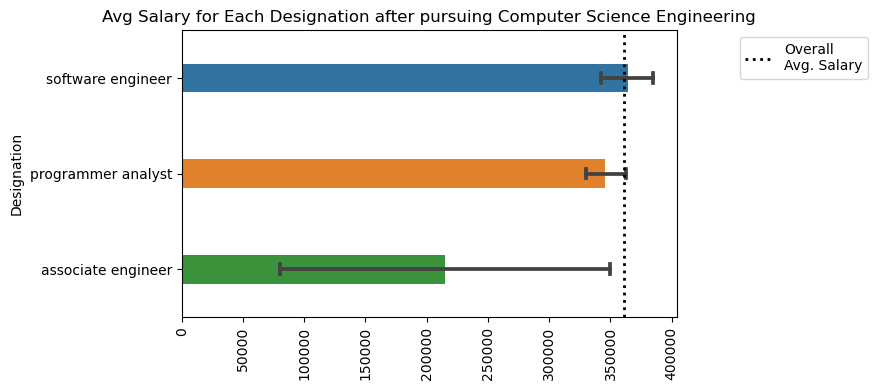

In [371]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x='Salary', y='Designation',
            data=df2,
            capsize=0.1,
            width=0.3,
            ax=ax)
ax.axvline(df2['Salary'].mean(), color='k',
           linestyle=':',
           linewidth=2, label='Overall\nAvg. Salary')
ax.set_title('Avg Salary for Each Designation after pursuing Computer Science Engineering')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


In [372]:
df2['Salary'].nunique()

83

In [373]:
from scipy import stats as st
popmean = 250000 + 300000 / 2
pv = st.ttest_1samp(df2['Salary'], popmean=popmean)[1]
alpha = 0.05
if pv < alpha:
    print('We reject the null hypothesis and Average salary is not equal to 250k')
else:
    print('We fail to reject null hypothesis and Average salary is equal to 250k')

We reject the null hypothesis and Average salary is not equal to 250k


### Therefore we can say that the claim Times of India making is not correct

### 2. Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [374]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

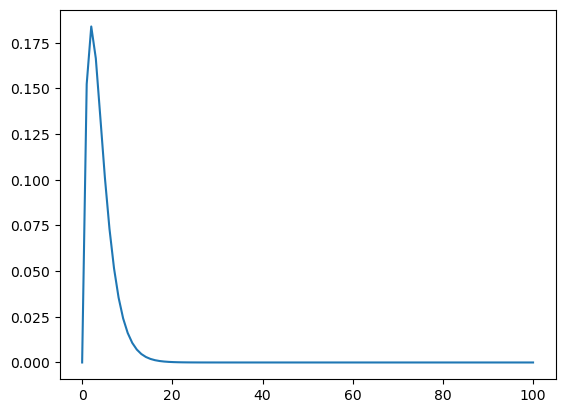

In [375]:
x = np.linspace(0, 100, 100)
y = chi2.pdf(x, df = 4)
plt.plot(x, y)

In [376]:
obsr = pd.crosstab(df.Specialization,df.Gender)
obsr

Gender,f,m
Specialization,,
CE,6,23
CSE,601,1688
EC,306,1013
EL,17,68
ME,12,207
other,15,41


In [377]:
chi2_statistic, chi2_p_value, chi2_dof, chi2_expected = chi2_contingency(obsr)

print("Statistic            :", chi2_statistic)
print('')
print("p value              :", chi2_p_value)
print('')
print("Degrees of freedom   :", chi2_dof)
print('')
print("Expected frequencies array:\n", chi2_expected)

Statistic            : 49.26560031142505

p value              : 1.9584544175343366e-09

Degrees of freedom   : 5

Expected frequencies array:
 [[   6.94345759   22.05654241]
 [ 548.05429072 1740.94570928]
 [ 315.8076057  1003.1923943 ]
 [  20.35151364   64.64848636]
 [  52.43507631  166.56492369]
 [  13.40805604   42.59194396]]


In [378]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, chi2_dof)

chi2_critical

11.070497693516351

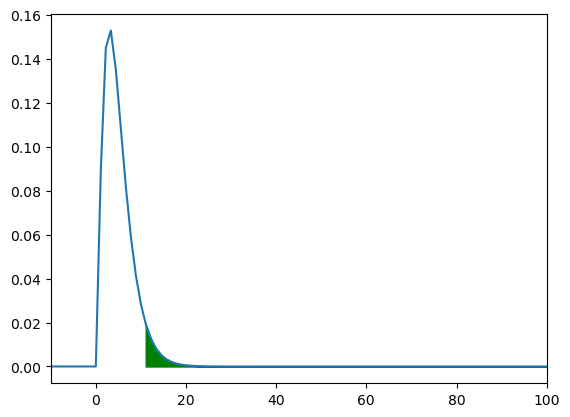

In [379]:
x_min = -10
x_max = 100

x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, chi2_dof)
plt.xlim(x_min, x_max)
plt.plot(x, y)

chi2_critical_right = chi2_critical

x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, chi2_dof)
plt.fill_between(x1, y1, color='green')

In [380]:
if(chi2_statistic > chi2_critical):
    print("There is not enough evidence to reject the Null Hypothesis")
else:
    print("There is sufficent evidence to reject the Null Hypothesis")

There is not enough evidence to reject the Null Hypothesis


In [381]:
if(chi2_p_value < alpha):
    print("There is not enough evidence to reject the Null Hypothesis")
else:
    print("There is sufficent evidence to reject the Null Hypothesis")

There is not enough evidence to reject the Null Hypothesis


### There is no enough evidence to say that Gender and specialization are related

## Creating a research question

### Is there any relation between the Degree and Salary

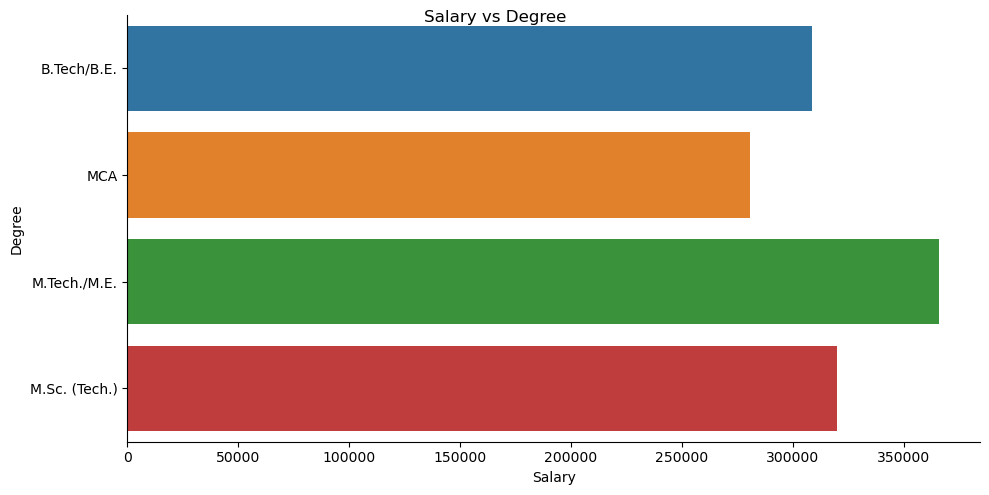

In [386]:
sns.catplot(x='Salary', y='Degree', kind='bar', data=df, ci=None, height=5, aspect=2)
plt.suptitle('Salary vs Degree')
plt.show()

### We can say from this plot that M.Tech/M.E students had a higher pay

### Conclusion
#### Data Understanding:

The dataset encompasses the employment outcomes of engineering graduates, focusing on target variable Salary.
Additionally, it includes standardized scores in three distinct areas: cognitive skills, technical skills, and personality skills.
#### Data Manipulation:

Upon initial observation, the dataset consists of 4000 rows and 40 columns.
The dataset exhibits numerous duplicate values, necessitating data manipulation.
Initially, we remove redundant rows and columns.
Subsequently, we assess for the presence of any missing values (NaN).
Following data cleaning, we proceed with visualization.
Data Visualization:

#### Univariate Analysis:

Univariate analysis encompasses various plots, including Cumulativee Distribution Functions (CDF), Histograms, Box Plots, and Summary Plots.
These visualizations illustrate probability and frequency distributions.
#### Bivariate Analysis:

Bivariate analysis comprises Scatterplots, Barplots, Crosstabs, Pivot tables, pie charts.
This analysis helps in comparing percentages across different variables.
Additionally, it aids in identifying outliers, as observed through Boxplots.
For instance, Countplots assist in identifying outliers within categorical variables, such as Job City, by highlighting the cities with higher employee counts.